## Import

In [59]:
import numpy as np
import time
import json

import pandas as pd
pd.set_option('display.float_format', '{:.4f}'.format)
pd.set_option('display.max_rows', 93)

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import warnings

# Отключить все предупреждения временно
warnings.filterwarnings("ignore")


from sklearn.impute import SimpleImputer

# Ваш код, вызывающий предупреждение о переполнении

# Включить предупреждения обратно
# warnings.filterwarnings("default")

In [55]:
train_df = pd.read_parquet("../data/raw/train_data.pqt")
test_df = pd.read_parquet("../data/raw/test_data.pqt")


cat_cols = [
    "channel_code", "city", "city_type",
    "okved", "segment", "start_cluster",
    "index_city_code", "ogrn_month", "ogrn_year",
]


train_df[cat_cols] = train_df[cat_cols].astype("category")
test_df[cat_cols] = test_df[cat_cols].astype("category")

df = pd.concat([train_df, test_df], ignore_index=True)
df_low = df[:3000]

## Funcs

In [2]:
import numpy as np
import time
import json

import pandas as pd
pd.set_option('display.float_format', '{:.4f}'.format)
pd.set_option('display.max_rows', 93)

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import warnings

# Отключить все предупреждения временно
warnings.filterwarnings("ignore")

# Ваш код, вызывающий предупреждение о переполнении

# Включить предупреждения обратно
# warnings.filterwarnings("default")

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [47]:
train_df = pd.read_parquet("../data/raw/train_data.pqt")
test_df = pd.read_parquet("../data/raw/test_data.pqt")


cat_cols = [
    "channel_code", "city", "city_type",
    "okved", "segment", "start_cluster",
    "index_city_code", "ogrn_month", "ogrn_year",
]


train_df[cat_cols] = train_df[cat_cols].astype("category")
test_df[cat_cols] = test_df[cat_cols].astype("category")

df = pd.concat([train_df, test_df], ignore_index=True)
df_low = df[:3000]

In [4]:
df = pd.read_parquet("../data/akm/df_restore_cal_avg_start_cluster_3.pqt")

In [6]:
df['start_cluster_month_3']

0          {α, γ}
1         {other}
2             {α}
3             {α}
4             {α}
           ...   
299995         {}
299996        {α}
299997        {α}
299998        {α}
299999        {α}
Name: start_cluster_month_3, Length: 300000, dtype: object

In [48]:
def get_df_low(code: int):
    train_df = pd.read_parquet(f"../data/interim/train_data_lm_{code}.pqt")
    test_df = pd.read_parquet(f"../data/interim/test_data_lm_{code}.pqt")

    cat_cols = [
        "channel_code", "city", "city_type",
        "okved", "segment", "start_cluster",
        "index_city_code", "ogrn_month", "ogrn_year",
    ]

    train_df[cat_cols] = train_df[cat_cols].astype("category")
    test_df[cat_cols] = test_df[cat_cols].astype("category")

    df = pd.concat([train_df, test_df], ignore_index=True)
    return df



def get_feature_description():
  feature_description = pd.read_excel("/content/drive/MyDrive/Alfa-hak/feature_description.xlsx") # import feature_description to merge description
  feature_description.columns =  ['col_name', 'description', 'type']
  return feature_description



def cat_column_summary(df):
    """Для категорий всех столбцов"""
    df = df.select_dtypes(exclude="number")
    summary_data = []

    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()

        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })


    summary_df = pd.DataFrame(summary_data)
    summary_df_with_fd = pd.merge(summary_df, feature_description, on='col_name', suffixes=('_left', '_right'), how='left')

    return summary_df_with_fd

def num_column_summary(df):
    """Для численных всех столбцов"""

    df = df.select_dtypes(include="number")
    summary_data = []

    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()
        mean = df[col_name].mean()
        std = df[col_name].std()
        min_val = df[col_name].min()
        q25 = df[col_name].quantile(0.25)
        q50 = df[col_name].quantile(0.50)
        q75 = df[col_name].quantile(0.75)
        max_val = df[col_name].max()


        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'mean': mean,
            'std': std,
            'min': min_val,
            'q25': q25,
            'q50': q50,
            'q75': q75,
            'max': max_val,
            'distinct_values_counts': distinct_values_counts

        })




    summary_df = pd.DataFrame(summary_data)
    summary_df_with_fd = pd.merge(summary_df, feature_description, on='col_name', suffixes=('_left', '_right'), how='left')

    return summary_df_with_fd
# Пустые значения


def get_nan_3_month_df(df):

  nan_3_month_df = pd.DataFrame(df['id'].unique(), columns=['id'])

  for column in df.columns[1:]:
    start_time = time.time()
    result = df.groupby('id')[column].apply(
        lambda x: x.isna().all()).reset_index()
    nan_3_month_df = pd.merge(
        nan_3_month_df, result, on='id', suffixes=('_left', '_right'), how='left')
    end_time = time.time()
  return nan_3_month_df



def process_nan(x):
    try:
        x = x.dropna(
        ).values[-1] if x.isna().any() and not x.isna().all() else np.nan
        return x
    except:
        print(x)
        return x




def get_nan_values_3_month_df(df):

  nan_3_month_df = pd.DataFrame(df['id'].unique(), columns=['id'])
  for column in df.columns[1:]:
    start_time = time.time()
    result = df.groupby('id')[column].apply(
        lambda x: process_nan(x)).reset_index()
    nan_3_month_df = pd.merge(
        nan_3_month_df, result, on='id', how='left')
    end_time = time.time()
    print(f"{column} {end_time - start_time}")
  return nan_3_month_df



def plt_null_df(df):

    plt.figure(figsize=(10, 8))

    plt.imshow(df, aspect="auto", interpolation="nearest", cmap="viridis")
    plt.xlabel("Column Number")
    plt.ylabel("Sample Number")
    plt.show()




# Корреляция
def plt_corr_df(df):

  corr_df = df.select_dtypes(include='number').corr().abs()

  plt.figure(figsize=(20, 15))
  dataplot = sns.heatmap(corr_df,
                        cmap="YlGnBu", annot=True, fmt=".1f",
                        annot_kws={'size': 5})
  plt.show()

def get_columns_corr(df, p: int):
  corr_df = df.select_dtypes(include='number').corr().abs()
  c1 = corr_df.unstack()


  c1.sort_values(ascending=True, inplace=True)
  columns_above = {(col1, col2) : c1[col1,col2] for col1, col2 in c1.index if c1[col1,col2] > p and col1 != col2}

  return dict(sorted(columns_above.items(), key=lambda item: item[1],reverse=True))

In [ ]:
nan_3_month_df

,id,date,balance_amt_avg,balance_amt_max,balance_amt_min,balance_amt_day_avg,channel_code,city,city_type,index_city_code,...,cnt_cred_g_oper_3m,cnt_days_cred_g_oper_3m,sum_deb_h_oper_3m,cnt_deb_h_oper_3m,cnt_days_deb_h_oper_3m,sum_cred_h_oper_3m,cnt_cred_h_oper_3m,cnt_days_cred_h_oper_3m,start_cluster,end_cluster
0,0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,2,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,3,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
199996,199996,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
199997,199997,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
199998,199998,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


## Test

#### Датасет со столбцами без пропусков

In [56]:
df_no_nan =df.dropna(axis=1)

In [58]:
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

print("MAE from Approach 2 (Imputation):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

,id,date,balance_amt_avg,balance_amt_max,balance_amt_min,balance_amt_day_avg,channel_code,city,city_type,index_city_code,...,cnt_cred_g_oper_3m,cnt_days_cred_g_oper_3m,sum_deb_h_oper_3m,cnt_deb_h_oper_3m,cnt_days_deb_h_oper_3m,sum_cred_h_oper_3m,cnt_cred_h_oper_3m,cnt_days_cred_h_oper_3m,start_cluster,end_cluster
0,0,month_1,0.7448,0.7055,1.2872,0.7481,channel_code_5,city_23,city_type_0,index_city_code_39,...,0.9512,0.5687,0.8976,0.5536,0.7744,0.9365,0.2960,0.9679,"{α, γ}",{other}
1,0,month_2,1.0496,0.8319,2.4586,1.0538,channel_code_5,city_23,city_type_0,index_city_code_39,...,0.9488,0.4997,0.7850,0.5519,0.6966,0.9902,0.2989,0.9460,"{α, γ}",{other}
2,0,month_3,0.6927,0.7403,0.4300,0.6957,channel_code_5,city_23,city_type_0,index_city_code_39,...,0.9465,0.4422,0.8770,0.5510,0.6632,0.8101,0.2948,0.9570,"{α, γ}",{other}
3,1,month_1,-0.0816,-0.0919,-0.1140,-0.0809,channel_code_2,city_14,city_type_0,NaN,...,0.9453,0.4078,0.3693,0.5671,0.7855,-0.1840,0.2535,0.4625,{other},{other}
4,1,month_2,-0.0950,-0.1005,-0.1193,-0.0943,channel_code_2,city_14,city_type_0,NaN,...,0.9461,0.4308,0.0673,0.5599,0.6966,-0.1839,0.2555,0.4954,{other},{other}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890115,299998,month_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.1656,NaN,NaN,-0.2011,NaN,NaN,{},NaN
890116,299998,month_6,-0.1553,-0.2037,-0.1260,-0.1560,channel_code_9,city_25,city_type_0,index_city_code_30,...,0.9445,0.3848,-0.1656,0.5469,0.4077,-0.2011,0.2509,0.3745,NaN,NaN
890117,299999,month_4,-0.1459,-0.1733,-0.1260,-0.1454,channel_code_9,city_6,city_type_0,index_city_code_34,...,0.9445,0.3848,-0.0976,0.5509,0.5744,-0.1014,0.2527,0.4405,{α},NaN
890118,299999,month_5,-0.1364,-0.1639,-0.1215,-0.1359,channel_code_9,city_6,city_type_0,index_city_code_34,...,0.9445,0.3848,-0.0479,0.5551,0.6966,-0.0349,0.2535,0.4734,{α},NaN


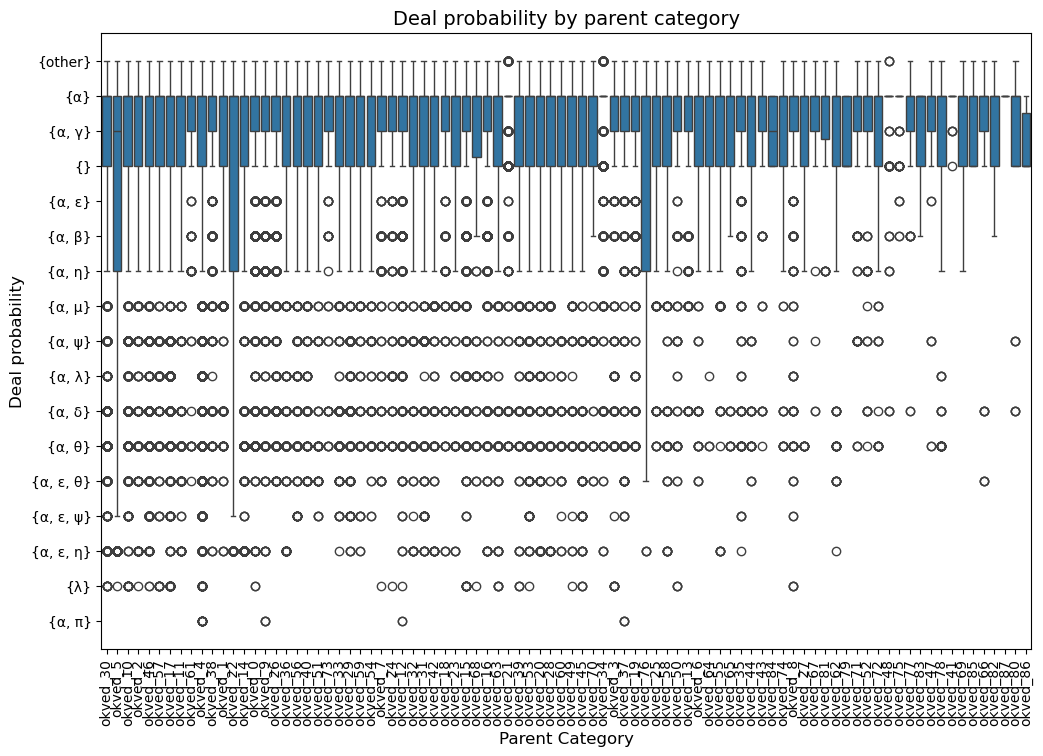

In [60]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="okved", y="end_cluster", data=df)
plt.ylabel('Deal probability', fontsize=12)
plt.xlabel('Parent Category', fontsize=12)
plt.title("Deal probability by parent category", fontsize=14)
plt.xticks(rotation='vertical')
plt.show()

In [40]:
df.groupby('city_type')['okved'].value_counts(
).sort_values(ascending=False)

city_type       okved   
city_type_0     okved_4     100070
                okved_5      99592
                okved_46     45338
                okved_10     43323
                okved_0      36868
                             ...  
city_type_3675  okved_73         1
city_type_1539  okved_46         1
city_type_7839  okved_5          1
city_type_7838  okved_32         1
city_type_1139  okved_11         1
Name: count, Length: 20027, dtype: int64

IndexError: index 0 is out of bounds for axis 0 with size 0

In [18]:
df[['city_type', 'index_city_code']].iloc[:].values

array([['city_type_0', 'index_city_code_39'],
       ['city_type_0', 'index_city_code_39'],
       ['city_type_0', 'index_city_code_39'],
       ...,
       ['city_type_0', 'index_city_code_34'],
       ['city_type_0', 'index_city_code_34'],
       ['city_type_0', 'index_city_code_34']], dtype=object)

In [13]:
list(df[['city_type', 'index_city_code']].iloc[:].values)

[array(['city_type_0', 'index_city_code_39'], dtype=object),
 array(['city_type_0', 'index_city_code_39'], dtype=object),
 array(['city_type_0', 'index_city_code_39'], dtype=object),
 array(['city_type_0', nan], dtype=object),
 array(['city_type_0', nan], dtype=object),
 array(['city_type_0', nan], dtype=object),
 array(['city_type_306', nan], dtype=object),
 array(['city_type_306', nan], dtype=object),
 array(['city_type_306', nan], dtype=object),
 array(['city_type_0', 'index_city_code_46'], dtype=object),
 array(['city_type_0', 'index_city_code_46'], dtype=object),
 array(['city_type_0', 'index_city_code_46'], dtype=object),
 array(['city_type_0', nan], dtype=object),
 array(['city_type_0', nan], dtype=object),
 array(['city_type_0', nan], dtype=object),
 array([nan, nan], dtype=object),
 array([nan, nan], dtype=object),
 array([nan, 'index_city_code_5'], dtype=object),
 array(['city_type_0', 'index_city_code_30'], dtype=object),
 array(['city_type_0', 'index_city_code_30'], dtype=o